# Loading Libraries


In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from scipy import stats

In [5]:
import numpy as np

In [2]:
from sklearn.svm import SVC

# Reading Files

In [6]:
white_wine = pd.read_csv('winequality-white.csv', delimiter = ';') #, header = None) # could have .json etc


In [7]:
red_wine = pd.read_csv('winequality-red.csv', delimiter = ';') # header = None if no columns given

# Data Exploration


In [8]:
###create a new variable 'wine_type'

red_wine['wine_type'] = 'red'


###bucket wine quality scores into qualitative quality labels

red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

In [9]:
###create a new variable 'wine_type'

white_wine['wine_type'] = 'white'


###create quality groups by label

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

# Cancatenate red and white wine


In [10]:
wines = pd.concat([red_wine, white_wine])

###re-shuffle records just to randomize data points

wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

In [11]:
wines.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium
5,7.2,0.53,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1,6,red,medium
6,7.5,0.27,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5,white,low
7,6.8,0.11,0.27,8.6,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,6,white,medium
8,9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.2,5,red,low
9,7.1,0.23,0.30,2.6,0.034,62.0,148.0,0.99121,3.03,0.56,11.3,7,white,medium


In [12]:
wines.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
6487,6.1,0.22,0.46,1.80,0.160,34.0,74.0,0.98840,3.19,0.33,13.4,6,white,medium
6488,10.3,0.50,0.42,2.00,0.069,21.0,51.0,0.99820,3.16,0.72,11.5,6,red,medium
6489,6.4,0.31,0.53,8.80,0.057,36.0,221.0,0.99642,3.17,0.44,9.1,5,white,low
6490,5.9,0.26,0.24,2.40,0.046,27.0,132.0,0.99234,3.63,0.73,11.3,5,white,low
6491,8.0,0.34,0.49,9.00,0.033,39.0,180.0,0.99360,3.13,0.38,12.3,8,white,high
6492,7.6,0.32,0.58,16.75,0.050,43.0,163.0,0.99990,3.15,0.54,9.2,5,white,low
6493,5.6,0.28,0.27,3.90,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,7,white,medium
6494,6.4,0.37,0.20,5.60,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,5,white,low
6495,6.5,0.26,0.50,8.00,0.051,46.0,197.0,0.99536,3.18,0.47,9.5,5,white,low
6496,7.2,0.62,0.06,2.70,0.077,15.0,85.0,0.99746,3.51,0.54,9.5,5,red,low



# ANOVA Test

In [13]:
from scipy import stats

F, p = stats.f_oneway(wines[wines['quality_label'] == 'low']['alcohol'],
wines[wines['quality_label'] == 'medium']['alcohol'],
wines[wines['quality_label'] == 'high']['alcohol'])
print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 673.0745347231032 	p-value: 2.2715337450621843e-266


NulL Hypothesis: 
There is no relation between wine alcohol levels and wine quality 
p-value of 2.2 - > Null Hypothesis rejected 

HA:
There is correlation between alcohol levels and wine quality
Alternative Hypothesis approved.
Next question - what is the relation alcohol levels and quality?




# Univariate Analysis

# Red Wine


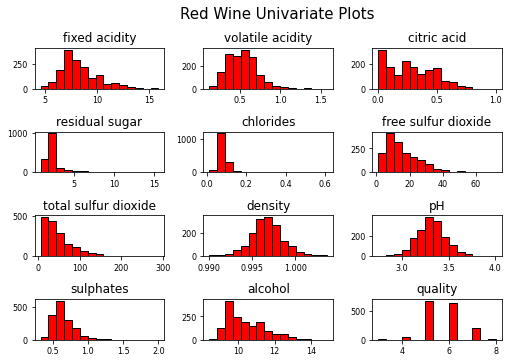

In [33]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

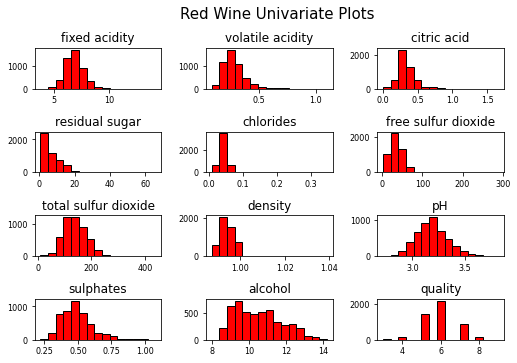

In [35]:
white_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

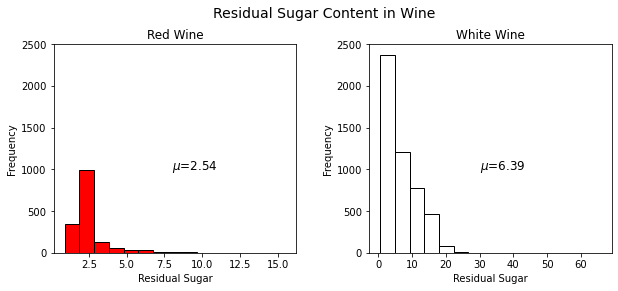

In [36]:
fig = plt.figure(figsize = (10,4))
title = fig.suptitle("Residual Sugar Content in Wine", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)
ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Residual Sugar")
ax1.set_ylabel("Frequency")
ax1.set_ylim([0, 2500])
ax1.text(8, 1000, r'$\mu$='+str(round(red_wine['residual sugar'].mean(),2)),
fontsize=12)
r_freq, r_bins, r_patches = ax1.hist(red_wine['residual sugar'], color='red', bins=15,
edgecolor='black', linewidth=1)
ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Residual Sugar")
ax2.set_ylabel("Frequency")
ax2.set_ylim([0, 2500])
ax2.text(30, 1000, r'$\mu$='+str(round(white_wine['residual sugar'].mean(),2)),
fontsize=12)
w_freq, w_bins, w_patches = ax2.hist(white_wine['residual sugar'], color='white', bins=15,
edgecolor='black', linewidth=1)


/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


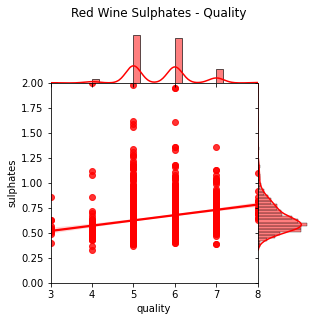

In [37]:
rj = sns.jointplot(x='quality', y='sulphates', data=red_wine,
kind='reg', ylim=(0, 2),
color='red', space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(3,9)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
t = fig.suptitle('Red Wine Sulphates - Quality', fontsize=12);

/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


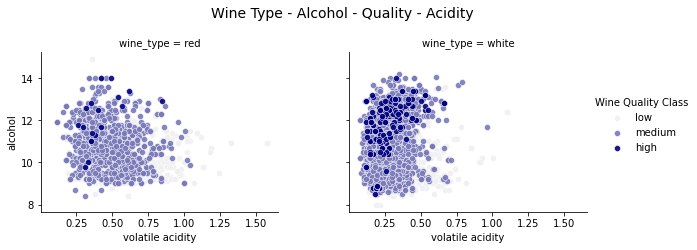

In [38]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label',
col_order=['red', 'white'], hue_order=['low', 'medium', 'high'],
aspect=1.2, size=3.5, palette=sns.light_palette('navy', 3))
g.map(plt.scatter, "volatile acidity", "alcohol", alpha=0.9,
edgecolor='white', linewidth=0.5)
fig = g.fig
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle('Wine Type - Alcohol - Quality - Acidity', fontsize=14)
l = g.add_legend(title='Wine Quality Class')

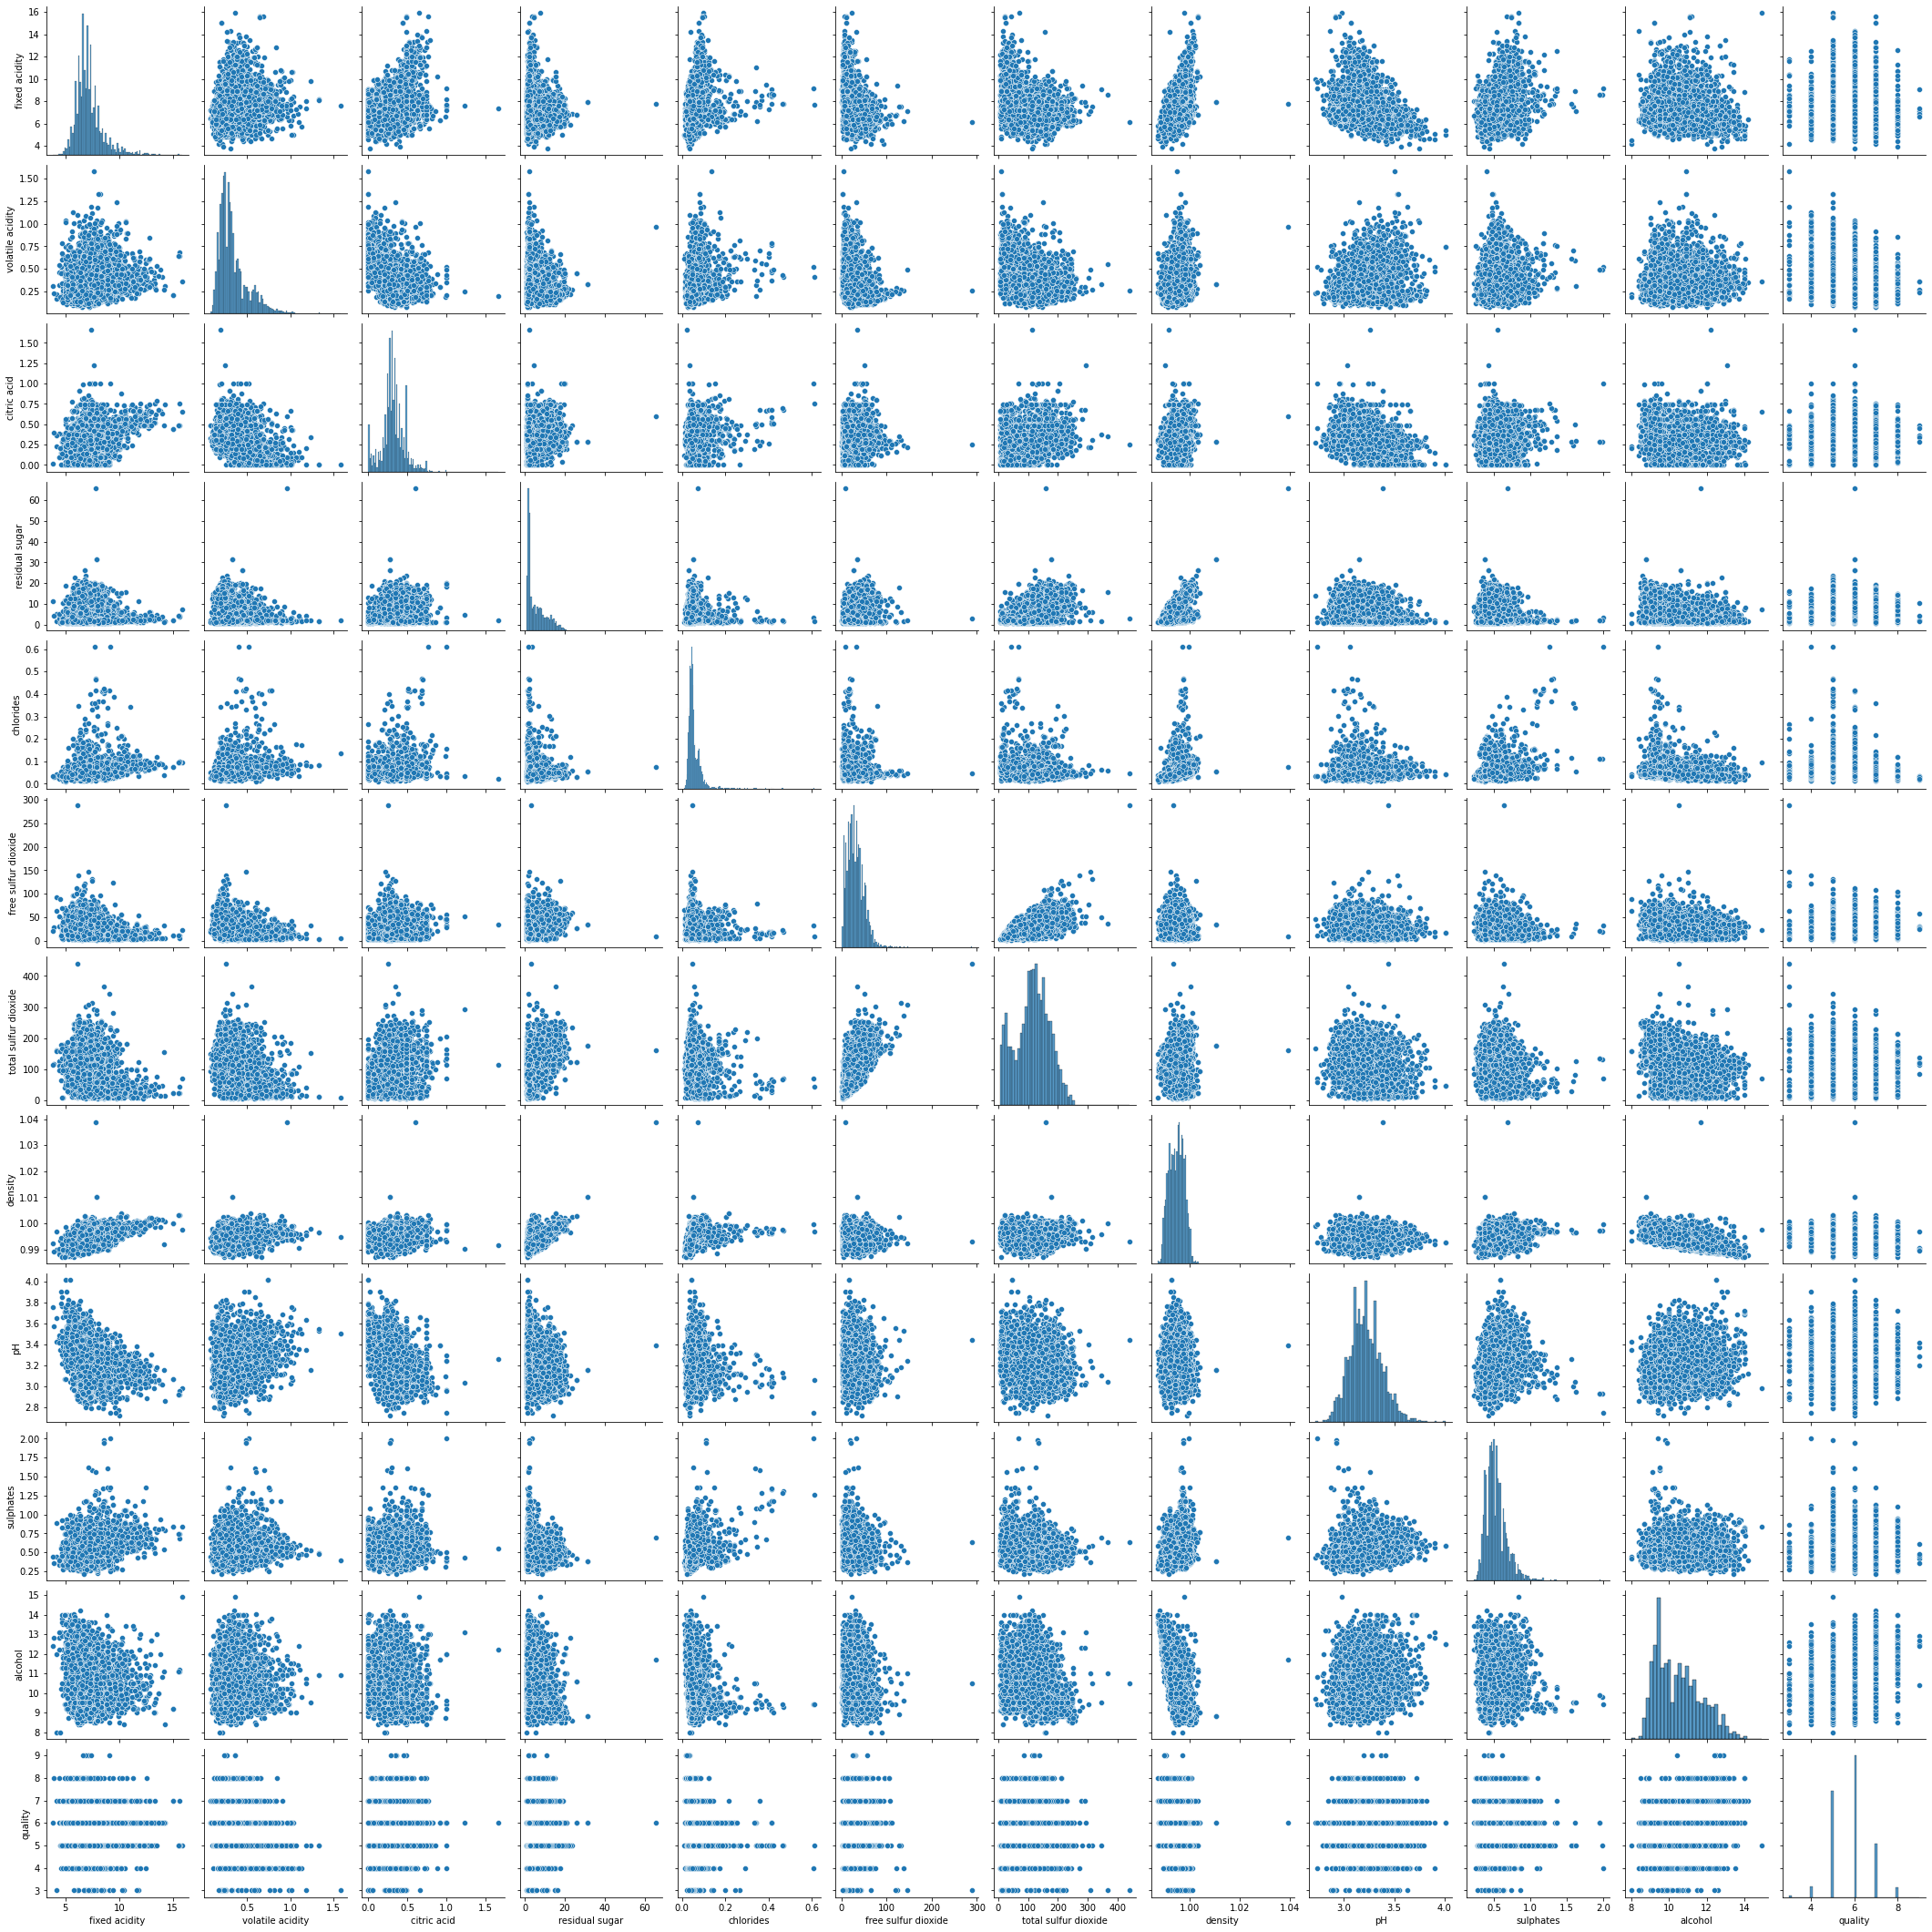

In [39]:
sns.pairplot(wines)

# Corelation Matrix and Visualisation

In [40]:
corr = wines.corr()

<AxesSubplot:>

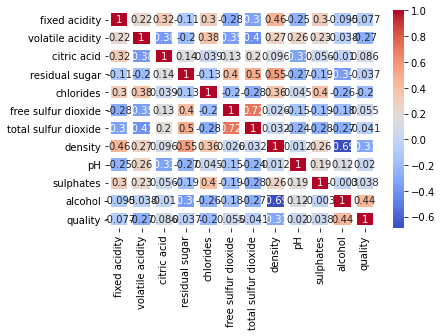

In [41]:
sns.heatmap(corr, linewidth = 5, cmap = "coolwarm", annot = True )

In [42]:
plt.figure(figsize = (12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [43]:
mask = np.triu(np.ones_like(corn, dtype=bool)) put.figuree(fig size = (12,8))
sis.set_style(“whitegrid”)
put.title(“Corelation matrix for red wines”) sis.heamap(corn, linewidth=.5, mask = mask, cmap =“coolwarm”, censer = 0, cannot = True)

/Users/charliesmooth/opt/anaconda3/lib/python3.8/site-packages/IPython/core/inputtransformer2.py:484: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  warnings.warn("`make_tokens_by_line` received a list of lines which do not have lineending markers ('\\n', '\\r', '\\r\\n', '\\x0b', '\\x0c'), behavior will be unspecified")


SyntaxError: invalid character in identifier (<ipython-input-43-494ee4f226a8>, line 1)

In [ ]:
plt


In [ ]:
mask = np.triu(np.ones_like(corn, dtype=bool))
put.figure(fig_size = (12,8))
sis.set_style(“whitegrid”)
put.title(“Corelation matrix for red wines”)
sis.heamap(corn, linewidth=.5, mask = mask, cmap =“coolwarm”, censer = 0, cannot = True)

In [ ]:
sns.relplot(x = 'fixed acidity', y = 'citric acid', data = wines)

In [ ]:
sns.relplot(x = 'pH', y = 'alcohol', data = wines)

In [ ]:
sns.relplot(x = 'fixed acidity', y =  'volatile acidity', hue = 'wine_type' , data = wines )


In [ ]:
sns.relplot(x = 'fixed acidity', y =  'volatile acidity', col = 'quality_label', kind = 'line' ,data = wines )

In [ ]:
sns.relplot(x = 'fixed acidity', y =  'pH', col = 'quality_label' ,data = wines )

In [ ]:
sns.catplot(x = 'wine_type', y = 'volatile acidity', kind = 'box', data = wines )

In [ ]:
wines.head()

In [ ]:
sns.catplot(x = 'quality_label', y = 'volatile acidity', kind = 'box', data = wines )

In [ ]:
sns.relplot(x = 'quality_label', y =  'alcohol', col = 'wine_type', kind = 'line' ,data = wines )


In [ ]:
sns.relplot(x = 'quality', y =  'alcohol', col = 'wine_type', kind = 'line' ,data = wines )


In [ ]:
sns.barplot(x="quality", y="alcohol", data=wines)

plt.show()

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12, 8))
sns.set_style("whitegrid")
plt.title("Correlation matrix for wines")
sns.heatmap(corr, linewidths=.5, mask = mask, cmap = "coolwarm", center = 0, annot = True)

Positive Corelation between Quality and ...


In [ ]:
sns.barplot(x="quality", y="sulphates", data=wines)

In [ ]:
 sns.relplot(x = 'quality', y =  'sulphates', col = 'wine_type', kind = 'line' ,data = wines )
     

In [ ]:
sns.barplot(x="quality", y="citric acid", data=wines)

In [ ]:
sns.relplot(x = 'quality', y =  'citric acid', col = 'wine_type', kind = 'line' ,data = wines )


In [ ]:
sns.barplot(x="quality", y="alcohol", data=wines)


In [ ]:
sns.relplot(x = 'quality', y =  'alcohol', col = 'wine_type', kind = 'line' ,data = wines )


Negative corelation:


In [ ]:
sns.barplot(x="quality", y="density", data=wines)



In [ ]:
sns.relplot(x = 'quality', y =  'density', col = 'wine_type', kind = 'line' ,data = wines )


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

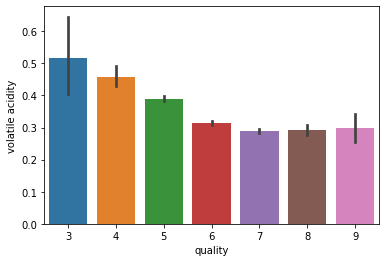

In [47]:
sns.barplot(x="quality", y="volatile acidity", data=wines)


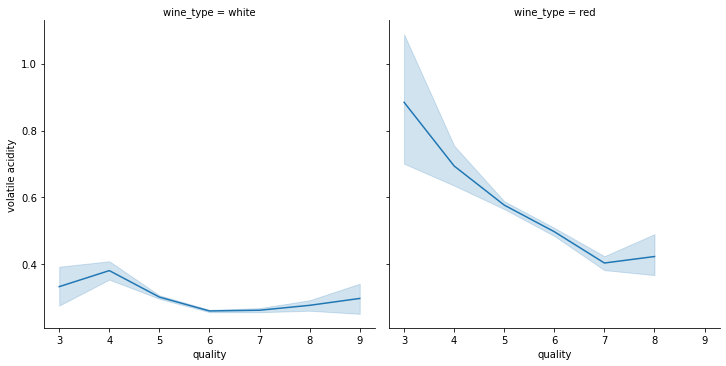

In [46]:
sns.relplot(x = 'quality', y =  'volatile acidity', col = 'wine_type', kind = 'line' ,data = wines )


<AxesSubplot:xlabel='quality', ylabel='chlorides'>

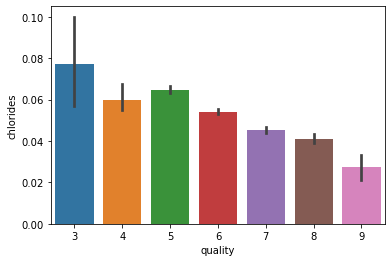

In [45]:
sns.barplot(x="quality", y="chlorides", data=wines)


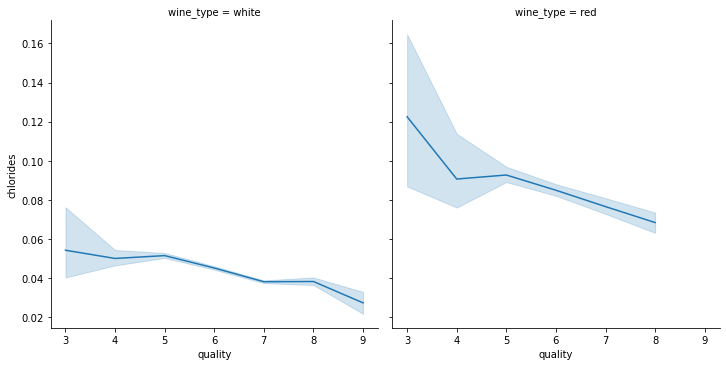

In [44]:
sns.relplot(x = 'quality', y =  'chlorides', col = 'wine_type', kind = 'line' ,data = wines )


In [ ]:
import this

# Machine Learning


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import model_evaluation_utils as meu
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [57]:
wtp_features = wines.iloc[:,:-3]
wtp_feature_names = wtp_features.columns
wtp_class_labels = np.array(wines['wine_type'])

wtp_train_X, wtp_test_X, wtp_train_y, wtp_test_y = train_test_split(wtp_features,
wtp_class_labels, test_size=0.3, random_state=42)

print(Counter(wtp_train_y), Counter(wtp_test_y))
print('Features:', list(wtp_feature_names))

Counter({'white': 3418, 'red': 1129}) Counter({'white': 1480, 'red': 470})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [58]:
wtp_ss = StandardScaler().fit(wtp_train_X)
# Scale the train set
wtp_train_SX = wtp_ss.transform(wtp_train_X)
# Scale the test set
wtp_test_SX = wtp_ss.transform(wtp_test_X)

In [59]:
from sklearn.linear_model import LogisticRegression

wtp_lr = LogisticRegression()
wtp_lr.fit(wtp_train_SX, wtp_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [60]:
from sklearn.metrics import classification_report

wtp_lr_predictions = wtp_lr.predict(wtp_test_SX)

print(classification_report(wtp_test_y,wtp_lr_predictions, target_names=['red', 'white']))

              precision    recall  f1-score   support

         red       0.99      0.99      0.99       470
       white       1.00      1.00      1.00      1480

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



In [61]:
wqp_features = wines.iloc[:,:-3]
wqp_class_labels = np.array(wines['quality_label'])
wqp_label_names = ['low', 'medium', 'high']
wqp_feature_names = list(wqp_features.columns)
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features,
wqp_class_labels, test_size=0.3, random_state=42)

print(Counter(wqp_train_y), Counter(wqp_test_y))
print('Features:', wqp_feature_names)

Counter({'medium': 2737, 'low': 1666, 'high': 144}) Counter({'medium': 1178, 'low': 718, 'high': 54})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [62]:
# Define the scaler
wqp_ss = StandardScaler().fit(wqp_train_X)
# Scale the train set
wqp_train_SX = wqp_ss.transform(wqp_train_X)
# Scale the test set
wqp_test_SX = wqp_ss.transform(wqp_test_X)

In [63]:
# train the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
wqp_dt = DecisionTreeClassifier()
wqp_dt.fit(wqp_train_SX, wqp_train_y)

# predict and evaluate performance
wqp_dt_predictions = wqp_dt.predict(wqp_test_SX)

print(classification_report(wqp_test_y,wqp_dt_predictions, target_names=wqp_label_names))

              precision    recall  f1-score   support

         low       0.25      0.31      0.28        54
      medium       0.69      0.68      0.68       718
        high       0.78      0.78      0.78      1178

    accuracy                           0.73      1950
   macro avg       0.57      0.59      0.58      1950
weighted avg       0.73      0.73      0.73      1950



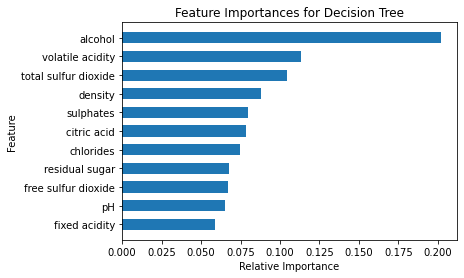

In [64]:
wqp_dt_feature_importances = wqp_dt.feature_importances_
wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(wqp_feature_names,
wqp_dt_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wqp_dt_feature_names)))
plt.barh(y_position, wqp_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_dt_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')